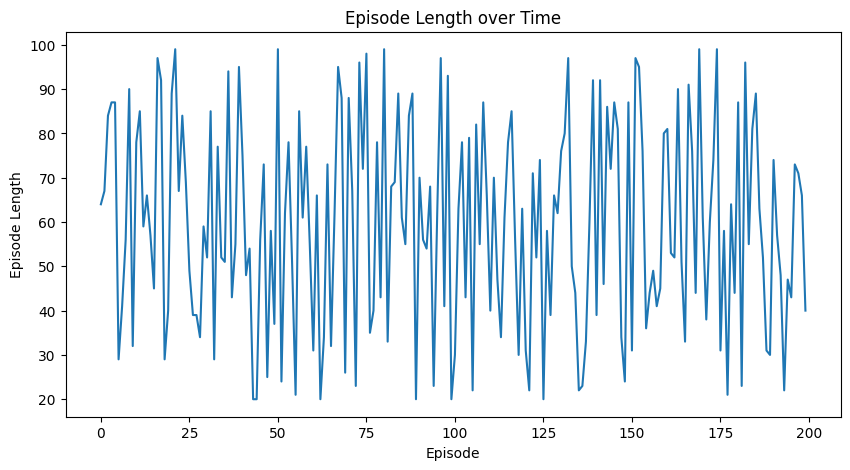

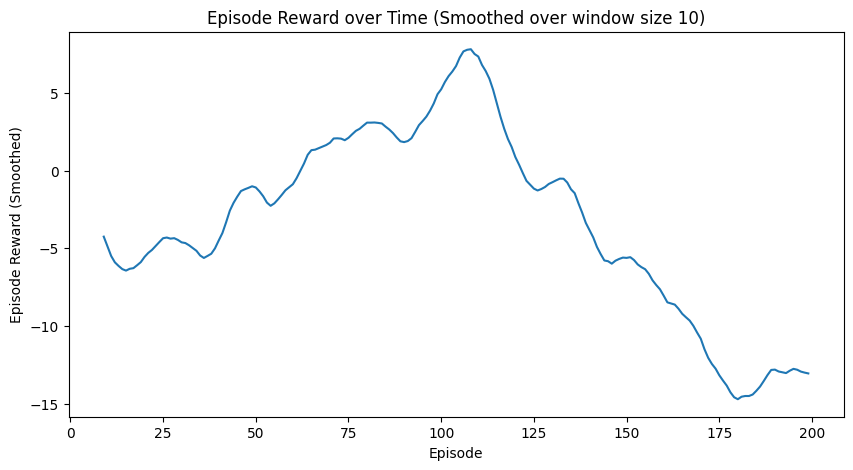

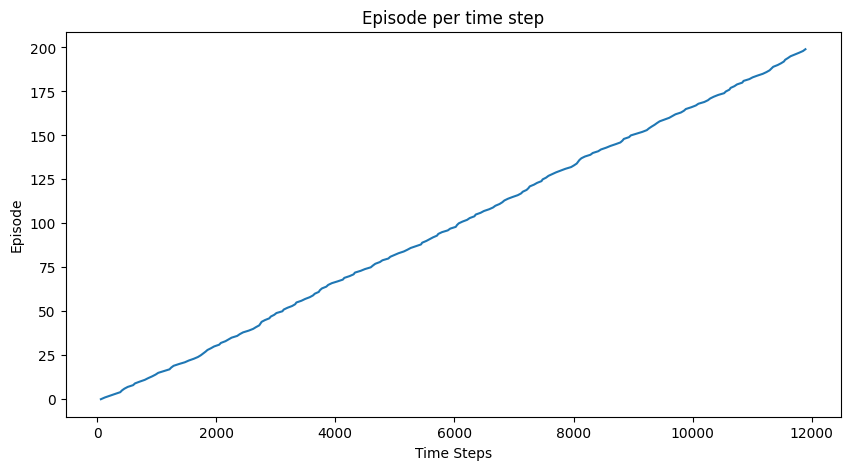

(<Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>,
 <Figure size 1000x500 with 1 Axes>)

In [1]:
import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定義EpisodeStats命名tuple，儲存每集的長度與獎勵
EpisodeStats = namedtuple("Stats", ["episode_lengths", "episode_rewards"])

# 建立模擬測試資料
np.random.seed(0)  # 設定隨機種子，讓結果可重現

# 隨機產生200集，每集長度20~99
dummy_stats = EpisodeStats(episode_lengths = np.random.randint(20, 100, size = 200),

# 正態分布獎勵並累加模擬趨勢
episode_rewards = np.random.normal(loc = 0, scale = 1, size = 200).cumsum())

# 繪製訓練過程統計圖
def plot_episode_stats(stats, smoothing_window = 10, noshow = False):

    # 第1張圖：每集長度變化
    fig1 = plt.figure(figsize = (10, 5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")                  # 橫軸為訓練集數
    plt.ylabel("Episode Length")           # 縱軸為集長
    plt.title("Episode Length over Time")  # 圖表標題

    if noshow:
        plt.close(fig1)  # 如果noshow為True，關閉圖形物件
    else:
        plt.show()       # 否則顯示圖形

    # 第2張圖：每集獎勵，並使用移動平均平滑資料
    fig2 = plt.figure(figsize = (10, 5))

    # 移動平均平滑處理
    rewards_smoothed = pd.Series(stats.episode_rewards).rolling(smoothing_window,
    min_periods = smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))

    if noshow:
        plt.close(fig2)  # 如果noshow為True，關閉圖形物件
    else:
        plt.show()       # 否則顯示圖形

    # 第3張圖：時間步長與訓練集數關係，顯示訓練進度
    fig3 = plt.figure(figsize = (10, 5))

    # 橫軸為累積步數，縱軸為集數
    plt.plot(np.cumsum(stats.episode_lengths), np.arange(len(stats.episode_lengths)))
    plt.xlabel("Time Steps")
    plt.ylabel("Episode")
    plt.title("Episode per time step")

    if noshow:
        plt.close(fig3)      # 如果noshow為True，關閉圖形物件
    else:
        plt.show()           # 否則顯示圖形
    return fig1, fig2, fig3  # 回傳三張圖物件

# 輸出測試資料並呼叫函數來畫圖
plot_episode_stats(dummy_stats)